In [1]:
from keras.datasets import cifar10
from keras.models import load_model
import numpy as np
from six.moves import cPickle as pickle

from IPython import display
import matplotlib.pyplot as plt

% matplotlib inline
% config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [2]:
# Fetch data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Convert uint8 pixel values to float32 in the range [0, 1] (for sigmoid)
X_test = X_test.astype('float32')
X_test /= 255

epochs = range(10, 501, 10)
acc_trend = []
for epoch in epochs:
    discriminator = load_model("networks/disc-" + str(epoch) + ".h5")

    preds = discriminator.predict(X_test)
    pred_class = np.argmax(preds, axis=1)

    accuracy = 0
    for pred, y in zip(pred_class, y_test):
        if pred == y:
            accuracy += 1
    accuracy /= 1. * len(y_test)
    acc_trend.append(accuracy)

    print "Epoch: {:d}, Accuracy: {:.4f}".format(epoch, accuracy)

Epoch: 10, Accuracy: 0.7601
Epoch: 20, Accuracy: 0.8067
Epoch: 30, Accuracy: 0.8205
Epoch: 40, Accuracy: 0.8251
Epoch: 50, Accuracy: 0.8342
Epoch: 60, Accuracy: 0.8323
Epoch: 70, Accuracy: 0.8344
Epoch: 80, Accuracy: 0.8345
Epoch: 90, Accuracy: 0.8355
Epoch: 100, Accuracy: 0.8396
Epoch: 110, Accuracy: 0.8336
Epoch: 120, Accuracy: 0.8346
Epoch: 130, Accuracy: 0.8387
Epoch: 140, Accuracy: 0.8435
Epoch: 150, Accuracy: 0.8383
Epoch: 160, Accuracy: 0.8390
Epoch: 170, Accuracy: 0.8403
Epoch: 180, Accuracy: 0.8388
Epoch: 190, Accuracy: 0.8453
Epoch: 200, Accuracy: 0.8428
Epoch: 210, Accuracy: 0.8469
Epoch: 220, Accuracy: 0.8403
Epoch: 230, Accuracy: 0.8414
Epoch: 240, Accuracy: 0.8405
Epoch: 250, Accuracy: 0.8447
Epoch: 260, Accuracy: 0.8410
Epoch: 270, Accuracy: 0.8444
Epoch: 280, Accuracy: 0.8436
Epoch: 290, Accuracy: 0.8427
Epoch: 300, Accuracy: 0.8407
Epoch: 310, Accuracy: 0.8447
Epoch: 320, Accuracy: 0.8369
Epoch: 330, Accuracy: 0.8418
Epoch: 340, Accuracy: 0.8405
Epoch: 350, Accuracy: 0

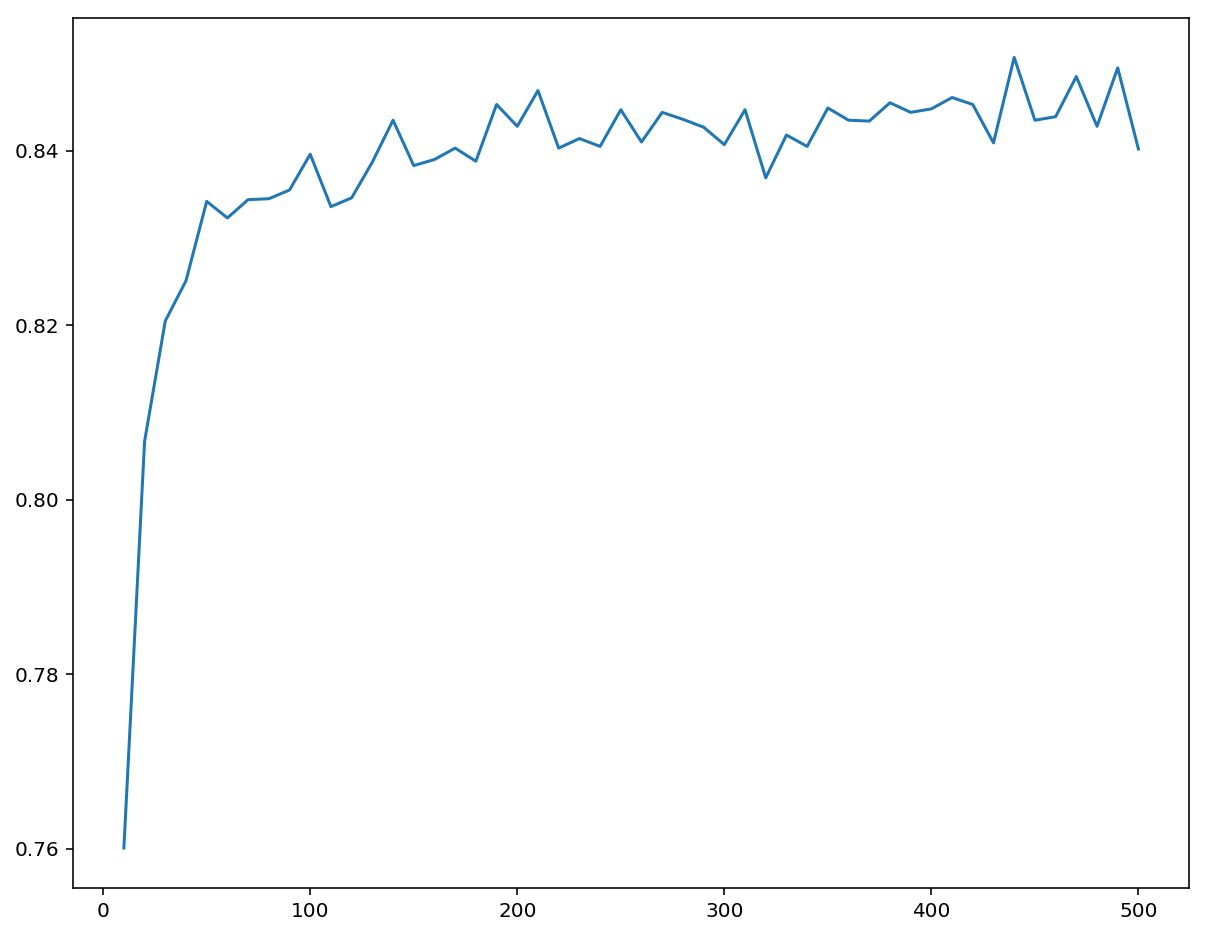

In [3]:
plt.figure(figsize=(10,8))
plt.plot(epochs, acc_trend)
plt.show()

In [4]:
pickle.dump(acc_trend, open("regular-Mode1n_acc.pickle", "wb" ))